<a href="https://colab.research.google.com/github/Patriciangugi/dsc-bernoulli-and-binomial-distribution/blob/master/Bernoulli_and_Binomial_Distribution_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
def factorial(n):
    prod = 1
    while n >= 1:
        prod = prod * n
        n = n - 1
    return prod

def binomial_probability(n, k, p):
    binomial_coeff = factorial(n) / (factorial(k) * factorial(n - k))

    probability = binomial_coeff * (p ** k) * ((1 - p) ** (n - k))

    return probability

n = 10
k = 3
p = 0.25

p_3_strikes = binomial_probability(n, k, p)
print(f"The probability of exactly 3 strikes in 10 rounds is: {p_3_strikes:.7f}")

The probability of exactly 3 strikes in 10 rounds is: 0.2502823


In [2]:
def binom_distr(n, p, k):

    binomial_coeff = factorial(n) / (factorial(k) * factorial(n - k))

    probability = binomial_coeff * (p ** k) * ((1 - p) ** (n - k))

    return probability

n = 10
p = 0.25
k = 3

p_3_strikes = binom_distr(n, p, k)
print(f"The probability of exactly {k} strikes in {n} rounds is: {p_3_strikes:.7f}")

The probability of exactly 3 strikes in 10 rounds is: 0.2502823


In [6]:
import numpy as np

def factorial(n):
    prod = 1
    while n >= 1:
        prod *= n
        n -= 1
    return prod

def binom_distr(n, p, k):

    binomial_coeff = factorial(n) / (factorial(k) * factorial(n - k))

    probability = binomial_coeff * (p ** k) * ((1 - p) ** (n - k))

    return probability

n = 10
p = 0.25

prob_at_least_5_strikes = 0
for k in range(5, n+1):
    prob_at_least_5_strikes += binom_distr(n, p, k)

print(f"The probability of having 5 strikes or more in a game is: {prob_at_least_5_strikes:.7f}")


The probability of having 5 strikes or more in a game is: 0.0781269


In [7]:
import numpy as np

def simulate_game(n, p):
    strikes = np.sum(np.random.rand(n) < p)
    return strikes

np.random.seed(123)
n_simulations = 5000
n_rounds = 10
p_strike = 0.25

results = np.zeros(n_simulations, dtype=int)
for i in range(n_simulations):
    results[i] = simulate_game(n_rounds, p_strike)

strike_counts = np.bincount(results, minlength=n_rounds+1)

print(np.arange(n_rounds+1))
print(strike_counts)

[ 0  1  2  3  4  5  6  7  8  9 10]
[ 290  899 1432 1265  737  284   80   10    3    0    0]


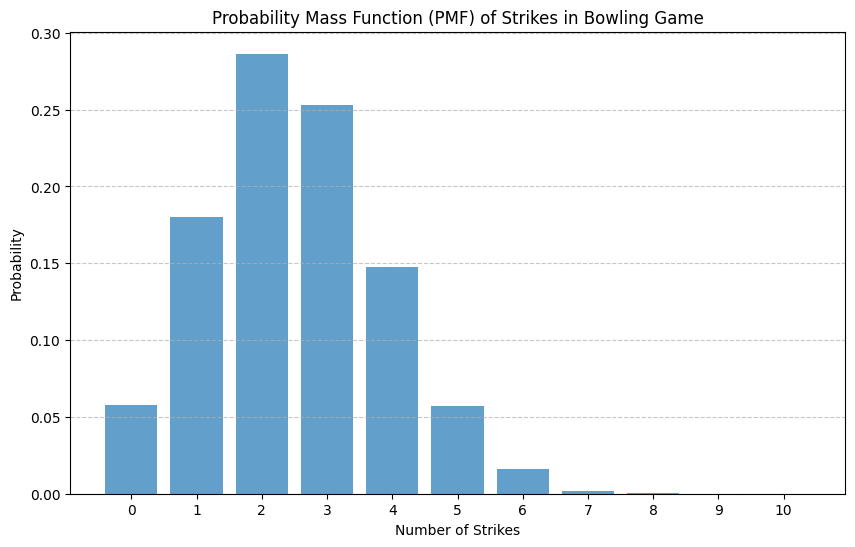

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_game(n, p):
    strikes = np.sum(np.random.rand(n) < p)
    return strikes

# Parameters
np.random.seed(123)
n_simulations = 5000
n_rounds = 10
p_strike = 0.25

results = np.zeros(n_simulations, dtype=int)
for i in range(n_simulations):
    results[i] = simulate_game(n_rounds, p_strike)

strike_counts = np.bincount(results, minlength=n_rounds+1)

pmf = strike_counts / n_simulations

plt.figure(figsize=(10, 6))
plt.bar(np.arange(n_rounds+1), pmf, align='center', alpha=0.7)
plt.xticks(np.arange(n_rounds+1))
plt.xlabel('Number of Strikes')
plt.ylabel('Probability')
plt.title('Probability Mass Function (PMF) of Strikes in Bowling Game')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

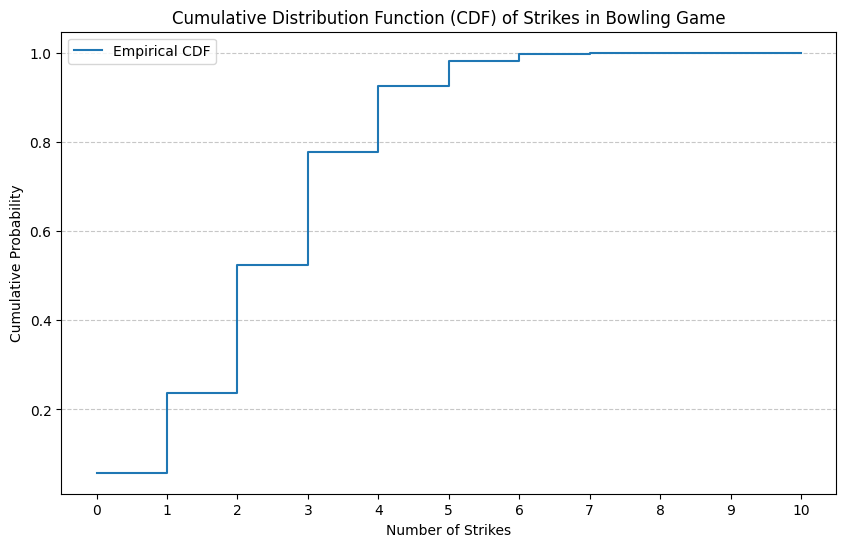

In [9]:
def simulate_game(n, p):
    strikes = np.sum(np.random.rand(n) < p)
    return strikes

np.random.seed(123)
n_simulations = 5000
n_rounds = 10
p_strike = 0.25

results = np.zeros(n_simulations, dtype=int)
for i in range(n_simulations):
    results[i] = simulate_game(n_rounds, p_strike)

strike_counts = np.bincount(results, minlength=n_rounds+1)

pmf = strike_counts / n_simulations

cdf = np.cumsum(pmf)

plt.figure(figsize=(10, 6))
plt.step(np.arange(n_rounds+1), cdf, where='post', label='Empirical CDF')
plt.xticks(np.arange(n_rounds+1))
plt.xlabel('Number of Strikes')
plt.ylabel('Cumulative Probability')
plt.title('Cumulative Distribution Function (CDF) of Strikes in Bowling Game')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()